In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
db = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019/itaCovid-19.csv")

In [3]:
db

,covid1,covid2,covid3,covid4
0,3,3,3,17
1,3,3,17,79
2,3,17,79,132
3,17,79,132,229
4,79,132,229,322
5,132,229,322,400
6,229,322,400,650
7,322,400,650,888
8,400,650,888,1128
9,650,888,1128,1689


In [4]:
y=db["covid4"];
X=db.drop('covid4', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
print("Training MLPRegressor...") #20, 50, 100, 150
reg = MLPRegressor(hidden_layer_sizes =(5,10,5 ),solver='adam',activation = 'relu',learning_rate='adaptive',learning_rate_init = 0.1,max_iter=10000, shuffle = False)
reg.fit(X_train,y_train)

Training MLPRegressor...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(5, 10, 5), learning_rate='adaptive',
             learning_rate_init=0.1, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=False, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

teste de overfiting
Mean squared error: 2843580.17
Variance score: 0.99


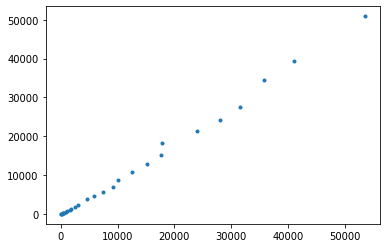

In [5]:
y_predict_train = reg.predict(X_train)
print("teste de overfiting")
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_predict_train))
print('Variance score: %.2f' % r2_score(y_train, y_predict_train))
plt.scatter(y_train,y_predict_train,marker='.')
plt.show()


Resultados
Mean squared error: 2239788.88
Variance score: 1.00


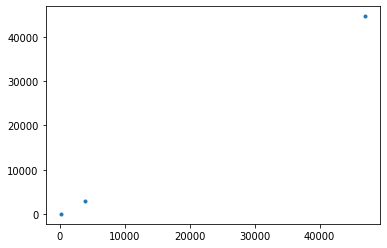

In [6]:
y_predict= reg.predict(X_test)
print("Resultados")
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predict))
print('Variance score: %.2f' % r2_score(y_test, y_predict))
plt.scatter(y_test,y_predict,marker='.')
plt.show()

In [7]:
dbBr = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019/Covid-19.csv")
dbBr = dbBr.drop('resp',axis=1)
xBr = dbBr.drop('casos4', axis=1)
yBr = dbBr['casos4']

Resultados
Mean squared error: 5973.90
Variance score: 0.79


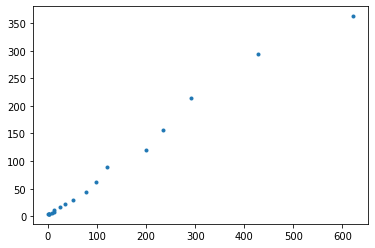

In [8]:
YbrPred = reg.predict(xBr)
print("Resultados")
print("Mean squared error: %.2f"
      % mean_squared_error(yBr, YbrPred))
print('Variance score: %.2f' % r2_score(yBr, YbrPred))
plt.scatter(yBr, YbrPred,marker='.')
plt.show()